In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from copy import deepcopy
from useful_functions_with_batch import *
from opt_function_with_batch import *
from network_utils import *
import matplotlib.pyplot as plt

In [65]:
d=10
L_total=8000
h_global, y_global, x_opt = init_global_data(d=d, L_total=L_total, seed=42)

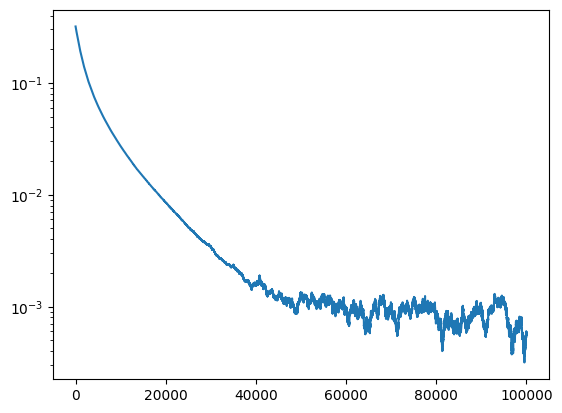

In [66]:
n=1
h_tilde, y_tilde = distribute_data(h=h_global, y=y_global, n=n)
x_star = generate_x_star(n=n, d=d, x_opt=x_opt, sigma_h=10)
init_x = init_x_func(n=n, d=d, seed=42)
A=generate_exponential_weight_matrix(n=1)
#show_row(A)

GT1 = PullDiag_GT_with_batch(
    A=A,
    init_x=init_x,
    h_data=h_tilde,
    y_data=y_tilde,
    grad_func=grad_with_batch,
    rho=1e-2,
    lr=2e-3,
    sigma_n=0,
    max_it=100000,
    batch_size=200
)
plt.semilogy(GT1["gradient_norm_on_full_trainset"])
plt.show()

A的第二大特征值: 0.7360318786212677
A的beta: 0.810217360924142
A的spectral gap: 0.18978263907585802
A的kappa: 2.000000000000005
S_A是: 39.898193112709905 



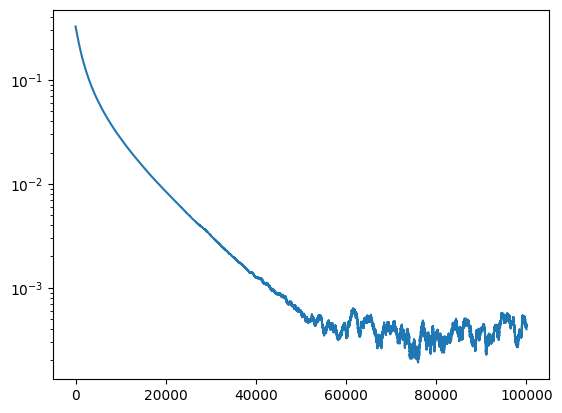

In [36]:
n=5
h_tilde, y_tilde = distribute_data(h=h_global, y=y_global, n=n)
x_star = generate_x_star(n=n, d=d, x_opt=x_opt, sigma_h=10)
init_x = init_x_func(n=n, d=d, seed=42)
A,B= ring1(n)
show_row(A)

GT5 = PullDiag_GT_with_batch(
    A=A,
    init_x=init_x,
    h_data=h_tilde,
    y_data=y_tilde,
    grad_func=grad_with_batch,
    rho=1e-2,
    lr=4e-4,
    sigma_n=0,
    max_it=100000,
    batch_size=200
)
plt.semilogy(GT5["gradient_norm_on_full_trainset"])
plt.show()

A的第二大特征值: 0.88149843072359
A的beta: 0.951212670347466
A的spectral gap: 0.04878732965253396
A的kappa: 2.00000000000001
S_A是: 219.49147627446408 



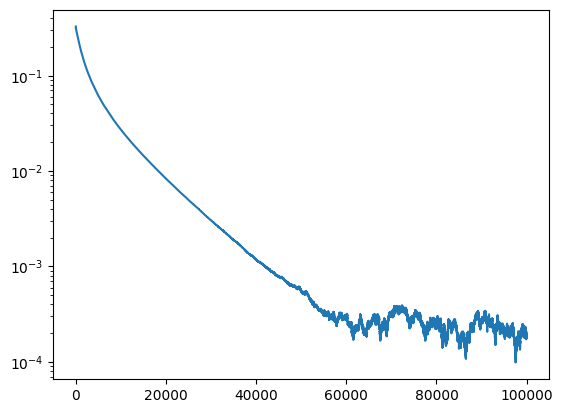

In [42]:
n=10
h_tilde, y_tilde = distribute_data(h=h_global, y=y_global, n=n)
x_star = generate_x_star(n=n, d=d, x_opt=x_opt, sigma_h=10)
init_x = init_x_func(n=n, d=d, seed=42)
A,B= ring1(n)
show_row(A)

GT10 = PullDiag_GT_with_batch(
    A=A,
    init_x=init_x,
    h_data=h_tilde,
    y_data=y_tilde,
    grad_func=grad_with_batch,
    rho=1e-2,
    lr=2e-4,
    sigma_n=0,
    max_it=100000,
    batch_size=200
)
plt.semilogy(GT10["gradient_norm_on_full_trainset"])
plt.show()

A的第二大特征值: 0.9372524233963279
A的beta: 0.9808005431766286
A的spectral gap: 0.01919945682337143
A的kappa: 2.000000000000017
S_A是: 705.4979507540617 



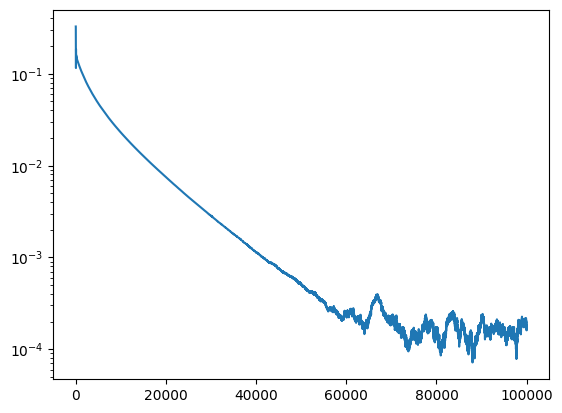

In [55]:
n=16
h_tilde, y_tilde = distribute_data(h=h_global, y=y_global, n=n)
x_star = generate_x_star(n=n, d=d, x_opt=x_opt, sigma_h=10)
init_x = init_x_func(n=n, d=d, seed=42)
A,B= ring1(n)
show_row(A)

GT16 = PullDiag_GT_with_batch(
    A=A,
    init_x=init_x,
    h_data=h_tilde,
    y_data=y_tilde,
    grad_func=grad_with_batch,
    rho=1e-2,
    lr=1.22e-4, #1e-3
    sigma_n=0,
    max_it=100000,
    batch_size=200
)
plt.semilogy(GT16["gradient_norm_on_full_trainset"])
plt.show()

A的第二大特征值: 0.9528743933090136
A的beta: 0.9876933686892809
A的spectral gap: 0.012306631310719074
A的kappa: 2.000000000000011
S_A是: 1230.5535433881282 



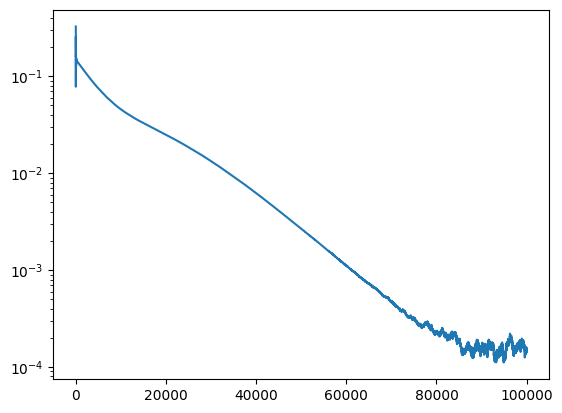

In [57]:
n=20
h_tilde, y_tilde = distribute_data(h=h_global, y=y_global, n=n)
x_star = generate_x_star(n=n, d=d, x_opt=x_opt, sigma_h=10)
init_x = init_x_func(n=n, d=d, seed=42)
A,B= ring1(n)
show_row(A)

GT20 = PullDiag_GT_with_batch(
    A=A,
    init_x=init_x,
    h_data=h_tilde,
    y_data=y_tilde,
    grad_func=grad_with_batch,
    rho=1e-2,
    lr=1e-4, #1e-3
    sigma_n=0,
    max_it=100000,
    batch_size=200
)
plt.semilogy(GT20["gradient_norm_on_full_trainset"])
plt.show()

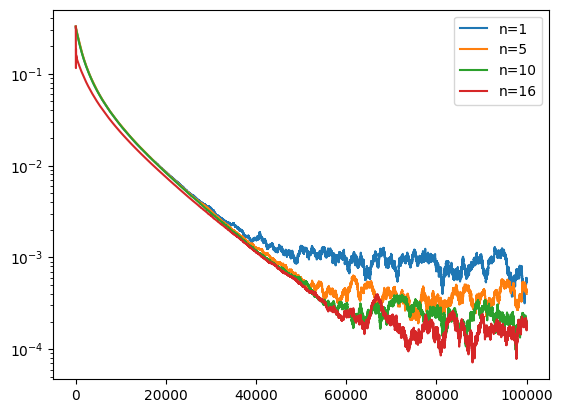

In [61]:
plt.semilogy(GT1["gradient_norm_on_full_trainset"], label="n=1")
plt.semilogy(GT5["gradient_norm_on_full_trainset"], label="n=5")
plt.semilogy(GT10["gradient_norm_on_full_trainset"], label="n=10")
plt.semilogy(GT16["gradient_norm_on_full_trainset"], label="n=16")
#plt.semilogy(GT20["gradient_norm_on_full_trainset"], label="n=20")
plt.legend()
plt.show()

In [21]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.ticker as ticker

def prettyshow(grads, legend, save='image.pdf', ylabel='Gradient Norm'):
    plt.rcParams['figure.figsize'] = 12, 8
    
    plt.figure()
    xlen = len(grads[0])
    colors = ['green', 'red', 'blue', 'orange', 'purple', 'brown']
    markers = ['d', '^', 'o', '<', '*', 's']
    idx_set = np.arange(0, xlen, xlen//10)
    
    for i in range(len(grads)):
        plt.semilogy(0, grads[i][0], color=colors[i], marker=markers[i], markersize=8)
    
    for i in range(len(grads)):
        for idx in idx_set:
            plt.semilogy(idx, grads[i][idx], color=colors[i], marker=markers[i], markersize=10, linestyle='None')
    
    for i in range(len(grads)):
        plt.semilogy(np.arange(xlen), grads[i], linewidth=2, color=colors[i])
    
    plt.legend(legend, prop={'size': 23, 'weight': 'bold'},loc='upper right',)
    plt.xlabel('Communication Rounds', fontsize=40, fontweight='bold')
    plt.ylabel(ylabel, fontsize=40, fontweight='bold')
    
    # 设置科学记数法格式
    ax = plt.gca()
    formatter = ticker.ScalarFormatter(useMathText=True)
    formatter.set_scientific(False)
    formatter.set_powerlimits((3, 6))  # 当数值超过1e3或1e6时使用科学记数法
    ax.xaxis.set_major_formatter(formatter)
    
    # 调整刻度数量和间隔
    ax.xaxis.set_major_locator(ticker.MaxNLocator(nbins=5))
    
    # 设置刻度标签和偏移文本的字体
    plt.xticks(fontsize=35, fontweight='bold')
    plt.yticks(fontsize=35, fontweight='bold')
    ax.xaxis.get_offset_text().set_fontsize(25)  # 调整科学记数法指数字体大小
    ax.xaxis.get_offset_text().set_fontweight('bold')
    
    plt.grid(True)
    plt.subplots_adjust(left=0.21, bottom=0.15)
    plt.savefig(save, bbox_inches='tight')
    plt.show()

In [11]:
import pandas as pd
df1 = pd.read_csv("/root/GanLuo/ICML2025_project/模拟数据/linear_speedup实验/output/GT_环状图,重复20次,lr=0.002,n=1.csv")
df5 = pd.read_csv("/root/GanLuo/ICML2025_project/模拟数据/linear_speedup实验/output/GT_环状图,重复20次,lr=0.0004,n=5.csv")
df10 = pd.read_csv("/root/GanLuo/ICML2025_project/模拟数据/linear_speedup实验/output/GT_环状图,重复20次,lr=0.0002,n=10.csv")
df16 = pd.read_csv("/root/GanLuo/ICML2025_project/模拟数据/linear_speedup实验/output/GT_环状图,重复20次,lr=0.000122,n=16.csv")

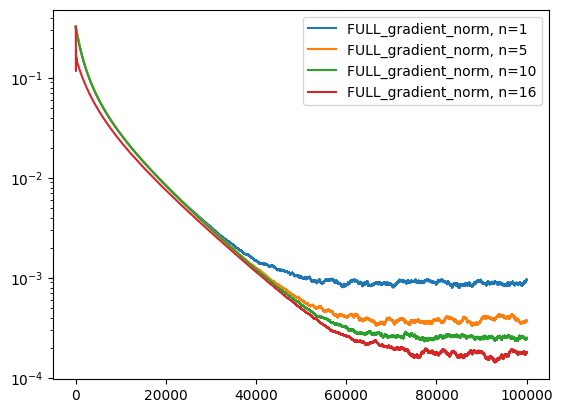

In [3]:
import matplotlib.pyplot as plt
plt.semilogy(df1["average_gradient_norm"],label="FULL_gradient_norm, n=1")
plt.semilogy(df5["average_gradient_norm"],label="FULL_gradient_norm, n=5")
plt.semilogy(df10["average_gradient_norm"],label="FULL_gradient_norm, n=10")
plt.semilogy(df16["average_gradient_norm"],label="FULL_gradient_norm, n=16")
plt.legend()
plt.show()

In [12]:
s=100000

grads = [
    df1["average_gradient_norm"][:s],
    df5["average_gradient_norm"][:s],
    df10["average_gradient_norm"][:s],
    df16["average_gradient_norm"][:s],
]
legend = [
    "n=1",
    "n=5",
    "n=10",
    "n=16",
]

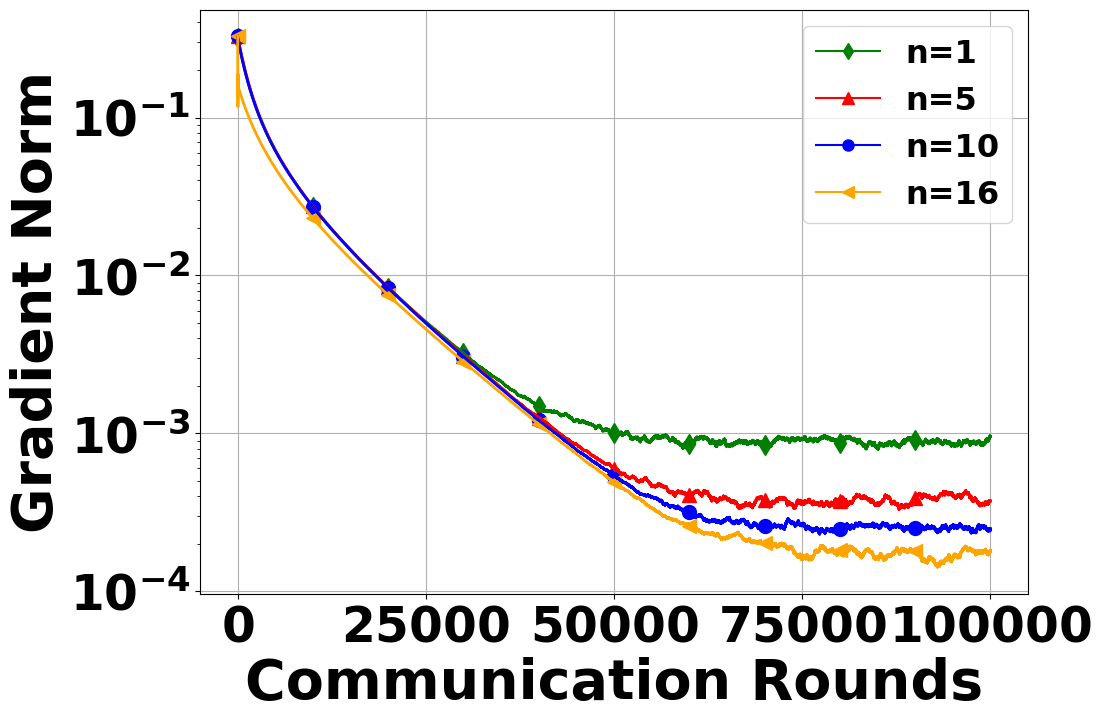

In [22]:
# 调用 prettyshow 函数
prettyshow(grads, legend, save="GT_RING_linear_speedup.pdf", ylabel="Gradient Norm")